In [1]:
import pandas as pd
import numpy as np

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

df = df[df['Country Code'] == 1]  # considering only INDIAN Restraunts 

df.reset_index(drop = True, inplace = True) # reseting the index

# summarising given cities as Delhi-NCR and other as Rest of India
df['City'].replace('New Delhi', 'Delhi-NCR', inplace = True)
df['City'].replace('Ghaziabad', 'Delhi-NCR', inplace = True)
df['City'].replace('Noida', 'Delhi-NCR', inplace = True)
df['City'].replace('Gurgaon', 'Delhi-NCR', inplace = True)
df['City'].replace('Faridabad', 'Delhi-NCR', inplace = True)

# all other cities as Rest of India
indexes = df[df['City'] != 'Delhi-NCR'].index

df.loc[indexes, 'City'] = 'Rest of India'
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3400025,Jahanpanah,1,Rest of India,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,3400341,Rangrezz Restaurant,1,Rest of India,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,3400005,Time2Eat - Mama Chicken,1,Rest of India,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Rest of India,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,3400017,Pinch Of Spice,1,Rest of India,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
5,3400325,MoMo Cafe,1,Rest of India,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
6,3400059,Peshawri - ITC Mughal,1,Rest of India,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
7,3400060,Taj Bano - ITC Mughal,1,Rest of India,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
8,3400348,G Thal,1,Rest of India,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
9,3400072,Dawat-e-Nawab - Radisson Blu,1,Rest of India,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46


# Ques 1.1:- Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

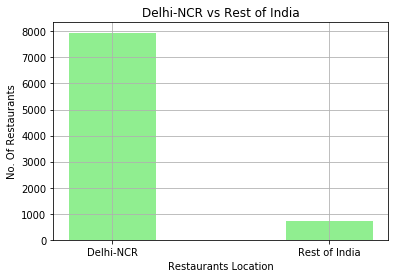

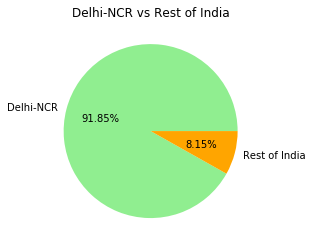

In [3]:
import matplotlib.pyplot as plt

count = df['City'].value_counts()  # counting number of restaurants according to City

restaurants_loc = count.index
restaurants_count = count.values

# plotting bar graph
plt.bar(restaurants_loc, restaurants_count, width = 0.4, color = 'lightgreen')
plt.grid()
plt.title('Delhi-NCR vs Rest of India')
plt.xlabel("Restaurants Location")
plt.ylabel("No. Of Restaurants")
plt.show()

# plotting pie chart
plt.pie(restaurants_count, labels = restaurants_loc, colors = ['lightgreen', 'orange'], autopct = '%.2f%%')
plt.title('Delhi-NCR vs Rest of India')
plt.show()

# # 1.2 Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [4]:
# creating 2 sets of cuisines according to the city.
NCR_cuisines = set()
Rest_cuisines = set()

df['Cuisines'] = df['Cuisines'].str.split(', ')  # splitting different cuisines to make a list of cuisines

# 2 dataframes containing rows having specific city.
NCR = df[df['City'] == 'Delhi-NCR']
Rest = df[df['City'] == 'Rest of India']

# adding cuisines in according to city.
for i in NCR.index : 
    for j in NCR.loc[i,'Cuisines']:
        NCR_cuisines.add(j)

for i in Rest.index : 
    for j in Rest.loc[i, 'Cuisines']:
        Rest_cuisines.add(j)
        
# cuisines served by restaurants of Rest of India but not in Delhi-NCR
unique_cuisines = Rest_cuisines - NCR_cuisines

for k in unique_cuisines:
    print(k)

German
Malwani
BBQ
Cajun


In [5]:
# fetching city-id for Delhi NCR
import requests

header = {"Accept":"application/json","user-key":"0ab9b3ea3b2aa96bf4b2843fb711a48f", 'User-agent' : 'curl/7/43.0'}
parameter = {'query' : 'Delhi NCR'}
response = requests.get('https://developers.zomato.com/api/v2.1/locations', headers = header,params = parameter)
data = response.json()
for i in data['location_suggestions']:
    city_id = i['city_id']
     
# fetching all cuisines in Delhi NCR

res = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = header,params = {'city_id' : city_id})
data1 = res.json()

# checking if Restaurants in Delhi-NCR serves any of uniques cuisines served in Rest of India but not in Delhi-NCR
for i in data1['cuisines']:
    if i['cuisine']['cuisine_name'] in unique_cuisines:
        print(i['cuisine']['cuisine_name'])

BBQ
Malwani


# # 1.3 Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [6]:
ncr = {}
rest = {}

for i in NCR.index : 
    for j in NCR.loc[i,'Cuisines']:
        ncr[j] = ncr.get(j, 0) + 1
        
for i in Rest.index : 
    for j in Rest.loc[i, 'Cuisines']:
        rest[j] = rest.get(j, 0) + 1

# sorting the list of cuisines according to their number of counts and fetching top 10 cuisines.
sorted_ncr = sorted(ncr.items(), key = lambda kv:kv[1], reverse = True)[:10]
sorted_rest = sorted(rest.items(), key = lambda kv:kv[1], reverse = True)[:10]

print('Top 10 cuisines served by maximum number of restaurants in Delhi NCR - ')
print()
for i in sorted_ncr:
    print(i[0],i[1])   
print()
          
print('Top 10 cuisines served by maximum number of restaurants in Rest of India -')
print()
for j in sorted_rest:
    print(j[0],j[1])

Top 10 cuisines served by maximum number of restaurants in Delhi NCR - 

North Indian 3597
Chinese 2448
Fast Food 1866
Mughlai 933
Bakery 697
South Indian 569
Continental 547
Desserts 542
Street Food 538
Italian 535

Top 10 cuisines served by maximum number of restaurants in Rest of India -

North Indian 349
Chinese 242
Continental 177
Italian 147
Cafe 136
Fast Food 97
South Indian 62
Mughlai 59
Desserts 55
Mexican 50


# # 1.4 Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

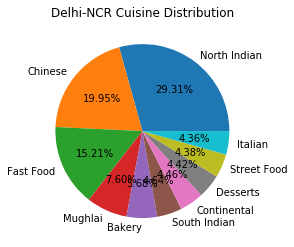

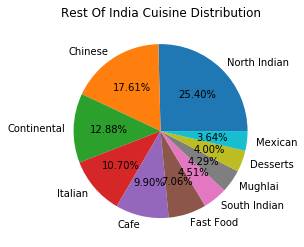

In [7]:
import matplotlib.pyplot as plt

# Cuisines names and their counts for Delhi-NCR and Rest of India
Delhi_cuisines_names = []
Delhi_cuisines_counts = []
rest_cuisine_name = []
rest_cuisine_count = []

for i in range(10):
    Delhi_cuisines_names.append(sorted_ncr[i][0])
    Delhi_cuisines_counts.append(sorted_ncr[i][1])
    rest_cuisine_name.append(sorted_rest[i][0])
    rest_cuisine_count.append(sorted_rest[i][1])

# plotting pie charts for top ten cuisines in Delhi-NCR and in Rest of India.
plt.pie(Delhi_cuisines_counts, labels = Delhi_cuisines_names, autopct = '%.2f%%')
plt.title('Delhi-NCR Cuisine Distribution')
plt.show()

plt.pie(rest_cuisine_count, labels = rest_cuisine_name, autopct = '%.2f%%')
plt.title('Rest Of India Cuisine Distribution')
plt.show()

# # 2.1Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

# 1. Number of Votes given Restaurant

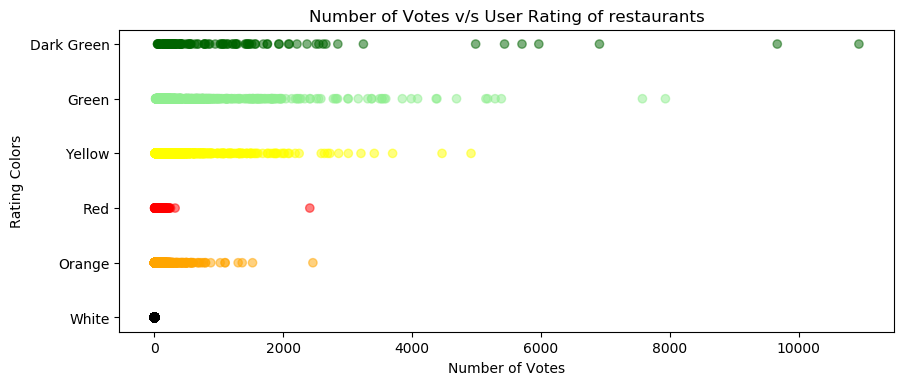

In [8]:
import pandas as pd
import numpy as np

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()
 
df = df[df['Country Code'] == 1]  # considering only INDIAN Restraunts

df.reset_index(drop = True, inplace = True)

# fetching votes and Rating color given to restaurants by sorting by number of votes given.
x = df.sort_values(by = 'Votes')['Votes']
y = df.sort_values(by = 'Votes')['Rating color']

# setting colors according to the Rating Color.
color = []
for i in y:
    if i == 'White':
        color.append('Black')
    elif i == 'Dark Green':
        color.append('DarkGreen')
    elif i == 'Green':
        color.append('lightGreen')
    else:
        color.append(i)

# plotting scatter graph
plt.figure(num=None, figsize=(10, 4), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(x,y, c = color, alpha = 0.5)
plt.title('Number of Votes v/s User Rating of restaurants')
plt.xlabel('Number of Votes')
plt.ylabel('Rating Colors')
plt.show()

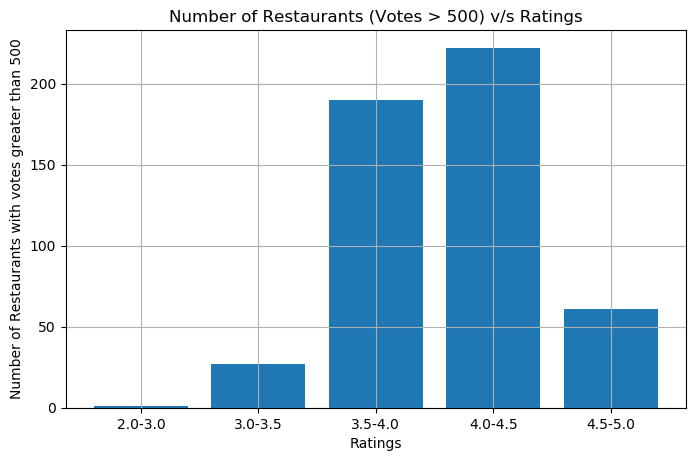

In [31]:
# fetching data for restaurants having votes greater than 500.
df1 = df[df['Votes'] > 500]
rating_count = df1['Rating color'].value_counts()

# taking number of votes for particular range of votings.
rating = ['2.0-3.0', '3.0-3.5','3.5-4.0', '4.0-4.5', '4.5-5.0']
number_votes = [ rating_count['Red'], rating_count['Orange'] , rating_count['Yellow'],
                 rating_count['Green'] , rating_count['Dark Green']]

# plotting bar graph.
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(rating, number_votes)
plt.grid()
plt.title('Number of Restaurants (Votes > 500) v/s Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Restaurants with votes greater than 500')
plt.show()

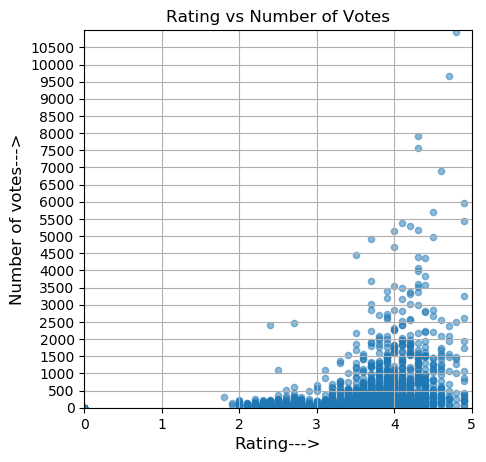

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# plotting scatter graph b/w Number of Votes and Ratings.
plt.figure(num=None, figsize=(5,5), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(df['Aggregate rating'], df['Votes'], s=20, alpha=0.5)
plt.yticks(np.arange(0, 11000, 500))
plt.axis([0, 5, 0, 11000])
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of votes--->', size=12)
plt.title('Rating vs Number of Votes')
plt.grid()
plt.show()

## 2.Restaurant serving more number of cuisines.

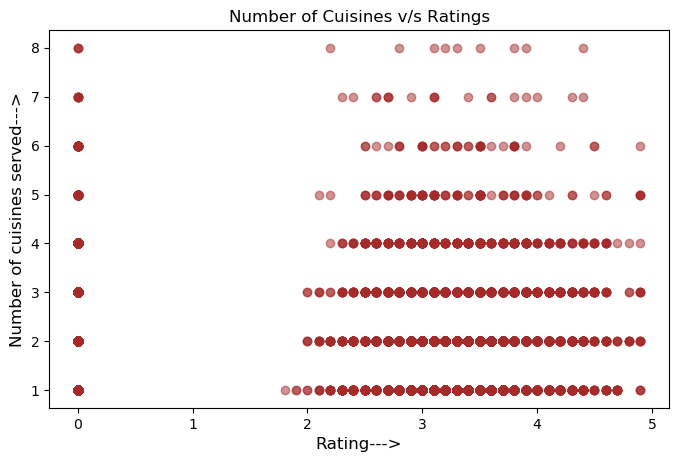

In [44]:
import pandas as pd
import numpy as np

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

df.reset_index(drop = True, inplace = True)

# splitting Cuisines of each restaurant to have them in a list.
df['Cuisines'] = df['Cuisines'].str.split(pat = ', ')

# creating column having Number of cuisines for a particular restaurant.
for i in df.index:
    df.loc[i,'Number of cuisines'] = len(df.loc[i,'Cuisines'])

# sorting values according to the Aggregate Rating.
x = df.sort_values(by = 'Aggregate rating')['Aggregate rating']

# plotting Scatter graph.
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(x, df['Number of cuisines'], c = 'brown', alpha = 0.5)
plt.title('Number of Cuisines v/s Ratings')
plt.xlabel('Rating--->', size=12)
plt.ylabel('Number of cuisines served--->', size=12)
plt.show()

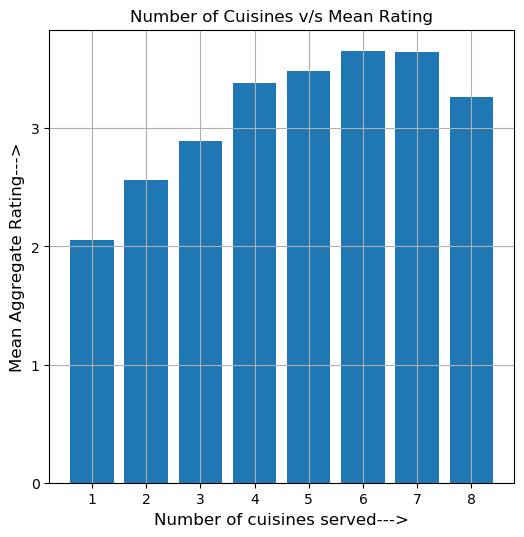

In [35]:
# calculating mean rating for each number of cuisines
mean_rating = []
cuisine_count = []
for i in range(1,9):
    rating = df[df['Number of cuisines'] == i]['Aggregate rating'].mean()
    mean_rating.append(rating)
    cuisine_count.append(i)
    
# plotting bar garph.
plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='green')
plt.grid()
plt.bar(cuisine_count, mean_rating)
plt.title('Number of Cuisines v/s Mean Rating')
plt.ylabel('Mean Aggregate Rating--->', size=12)
plt.xlabel('Number of cuisines served--->', size=12)
plt.yticks(np.arange(0, 4.0, 1))
plt.show()

# # 3. Average Cost of Restaurant

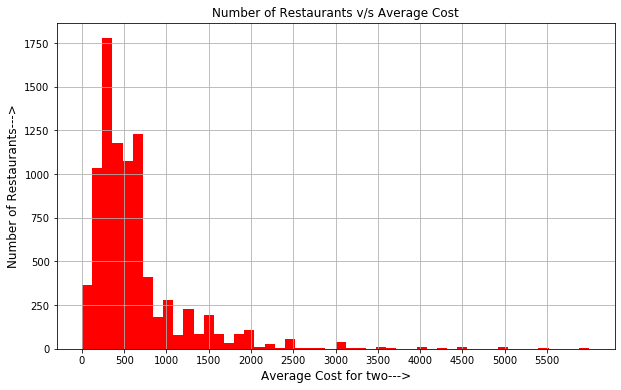

In [41]:
# plotting histogram for number of restaurants and their average cost.
plt.figure(num=None, figsize=(10, 6),facecolor='w')
plt.hist(df['Average Cost for two'],range=[0,6000], facecolor='red', align='mid',bins=50)
plt.xticks(np.arange(0, 6000, 500))
plt.grid()
plt.title('Number of Restaurants v/s Average Cost')
plt.xlabel('Average Cost for two--->', size=12)
plt.ylabel('Number of Restaurants--->', size=12)
plt.show()

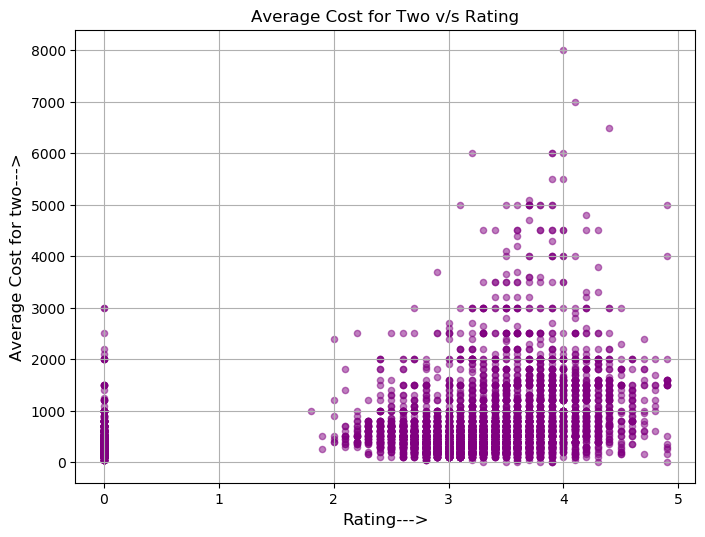

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

df['Aggregate rating'].dropna(inplace = True)

# plotting scatter graph.
plt.figure(num=None, figsize=(8,6), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(df['Aggregate rating'], df['Average Cost for two'], s=20, alpha=0.5, c = 'purple')
plt.xlabel('Rating--->', size=12)
plt.ylabel('Average Cost for two--->', size=12)
plt.title('Average Cost for Two v/s Rating')
plt.grid()
plt.show()


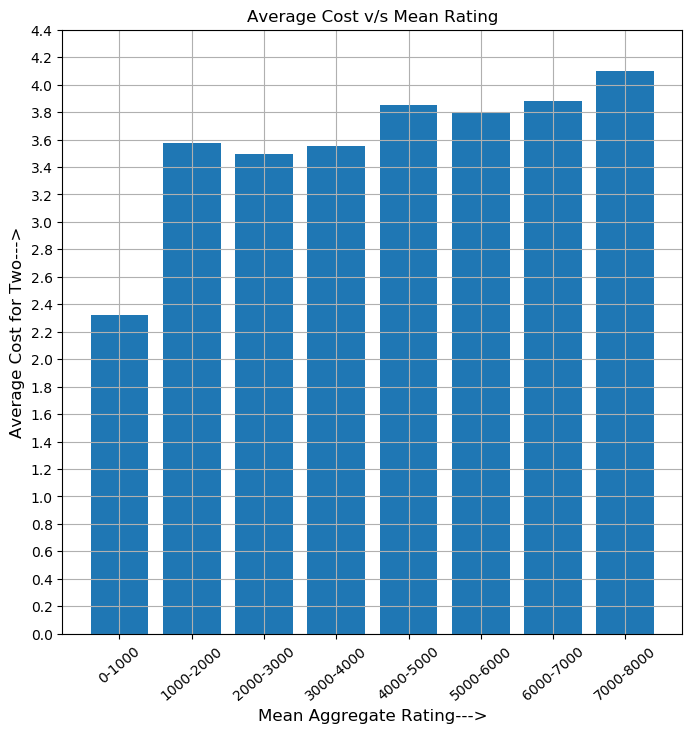

In [45]:
# calculating mean Rating for each range of average costs.
mean_rating = []
average_cost = []
for i in range(0,8000,1000):
    rating = df[(df['Average Cost for two'] >= i) & (df['Average Cost for two'] < (i + 1000))]['Aggregate rating'].mean()
    mean_rating.append(rating)
    cost = str(i) + '-' + str(i+1000)
    average_cost.append(cost)

# plotting bar graph.
plt.figure(num=None, figsize=(8, 8), dpi=100, facecolor='w', edgecolor='green')
plt.grid()
plt.bar(average_cost, mean_rating)
plt.title('Average Cost v/s Mean Rating')
plt.yticks(np.arange(0, 4.5, 0.2))
plt.xlabel('Mean Aggregate Rating--->', size=12)
plt.ylabel('Average Cost for Two--->', size=12)
plt.xticks(rotation = 40)
plt.show()

# # 4. Restaurant serving some specific cuisines.

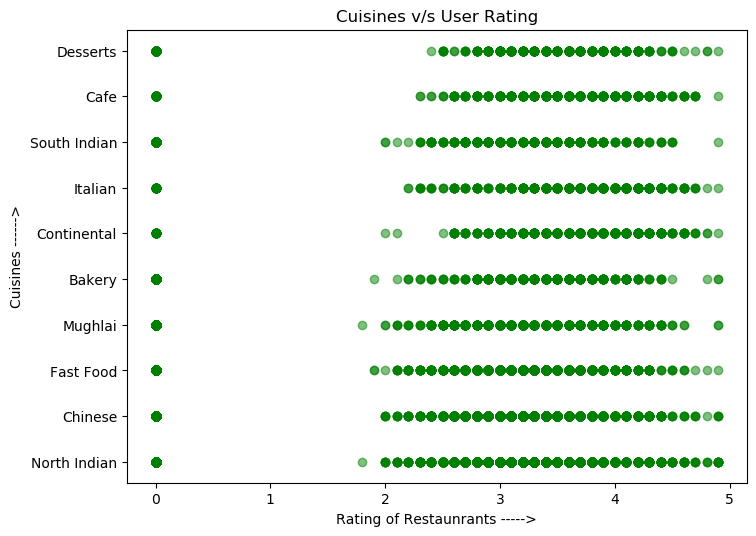

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# splitting cuisines and making dictionary of cuisines and their counts
df['Cuisines'] = df['Cuisines'].str.split(', ')
cuisines = {}

for i in df['Cuisines'] : 
    for j in i:
        cuisines[j] = cuisines.get(j, 0) + 1

# sorting dictionary according to the count of cuisines and fetching top 10 cuisines.
sorted_cuisines = sorted(cuisines.items(), key = lambda kv:kv[1], reverse = True)[:10]

# fetching names of top 10 cuisines.
popular_cuisines=[]
for i in sorted_cuisines:
    popular_cuisines.append(i[0])
    
# fetching name and ratings of the particular cuisine of particular restaurant.
rating = []
cuisine = []
for i in popular_cuisines:
    for j, k in zip(df['Cuisines'], df['Aggregate rating']):
        if i in j:
            rating.append(k)
            cuisine.append(i)
            
# plotting scatter graph for cuisine and its user rating.
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(rating,cuisine, alpha = 0.5, c = 'green')
plt.title('Cuisines v/s User Rating')
plt.xlabel('Rating of Restaunrants ----->')
plt.ylabel('Cuisines ------>')
plt.show()

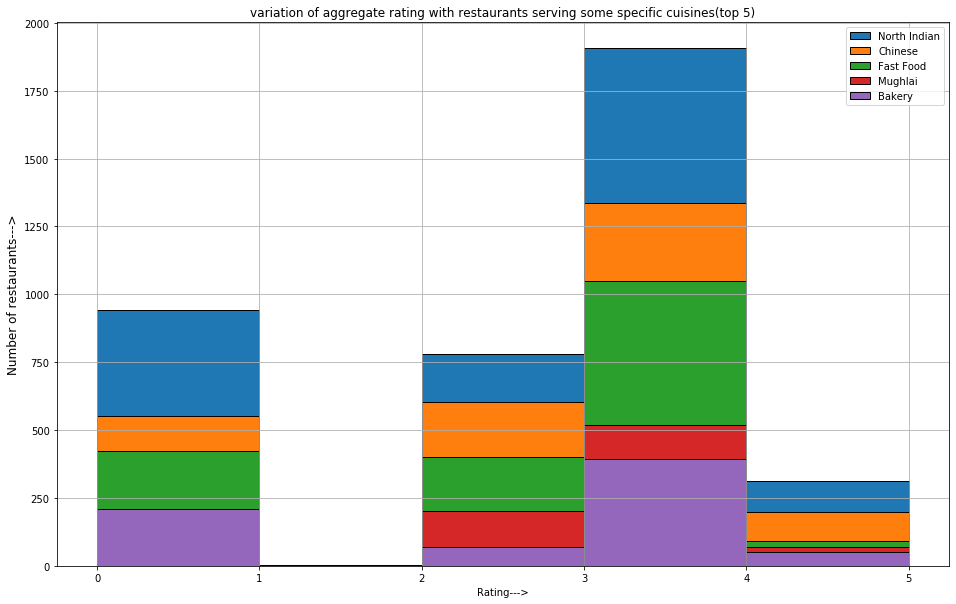

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# creating dict containing names of cuisines and their count.
cuisine=dict()
for i in df["Cuisines"]:
    a=i.split(',')
    for j in a:
        j=j.strip()
        cuisine[j]=cuisine.get(j, 0) + 1

# sorting dictionary according to the count of cuisines and fetching top 10 cuisines.
popular=sorted(cuisine.items(),key=lambda kv:kv[1], reverse=True)[:5] 

# fetching names of top 10 cuisines.
popular_cuisines=[]
for i in popular:
    popular_cuisines.append(i[0])

plt.figure(num=None, figsize=(16, 10))

# fetching ratings of the particular cuisine of particular restaurant.
for i in popular_cuisines:
    rating=[]
    for j, k in zip(df.Cuisines, df['Aggregate rating']):
        if i in j:
            rating.append(k)
            
# plotting histogram for each cuisine .
    plt.hist(rating, edgecolor='black', bins=[0, 1, 2, 3, 4, 5])
    plt.xlabel('Rating--->')
    plt.ylabel('Number of restaurants--->', size = 12)
    plt.title('variation of aggregate rating with restaurants serving some specific cuisines(top 5)', size = 12)
plt.grid()
plt.legend(labels=popular_cuisines)
plt.show()


## Ques 2.2:- Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

# 1. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# grouping dataframe by Locality column and calculating Weighted Rating of Restaurant.
x = df.groupby(by = 'Locality').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'Locality').apply(lambda x: (x['Votes'].sum()))

weighted_rating = x/y
round(weighted_rating, 3)

# sorting Localities and their ratings by ratings and taking their top 10 localities.
sorted_weighted_rating = weighted_rating.sort_values(ascending = False)[0:10]

print('top 10 localities with more weighted restaurant rating ->')
print()
print(round(sorted_weighted_rating, 2))

top 10 localities with more weighted restaurant rating ->

Locality
Aminabad                            4.90
Hotel Clarks Amer, Malviya Nagar    4.90
Friends Colony                      4.89
Powai                               4.84
Kirlampudi Layout                   4.82
Express Avenue Mall,  Royapettah    4.80
Deccan Gymkhana                     4.80
Banjara Hills                       4.72
Sector 5, Salt Lake                 4.71
Riverside Mall, Gomti Nagar         4.70
dtype: float64


# Ques 3.1:- Plot the bar graph top 15 restaurants have a maximum number of outlets.

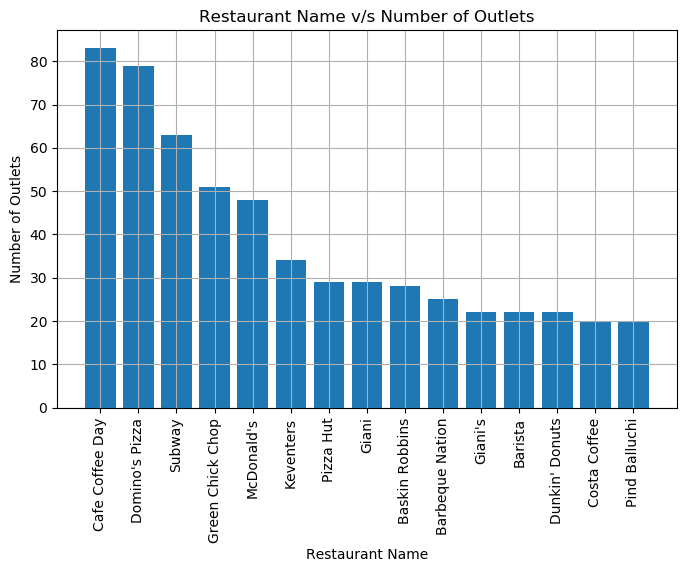

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Keventers           34
Pizza Hut           29
Giani               29
Baskin Robbins      28
Barbeque Nation     25
Giani's             22
Barista             22
Dunkin' Donuts      22
Costa Coffee        20
Pind Balluchi       20
Name: Restaurant Name, dtype: int64


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# restaurants and the count of those restaurants.
restaurants = df['Restaurant Name'].value_counts()

# sorting those restaurants by the number of those restaurants and fetching top 15 of those.
sorted_values = restaurants.sort_values(ascending = False)[0:15]

x = sorted_values.index
y = sorted_values.values

# plotting bar graph
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(x,y)
plt.grid()
plt.title('Restaurant Name v/s Number of Outlets')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation = 90)
plt.show()
print(sorted_values)

# Ques 3.2:- Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

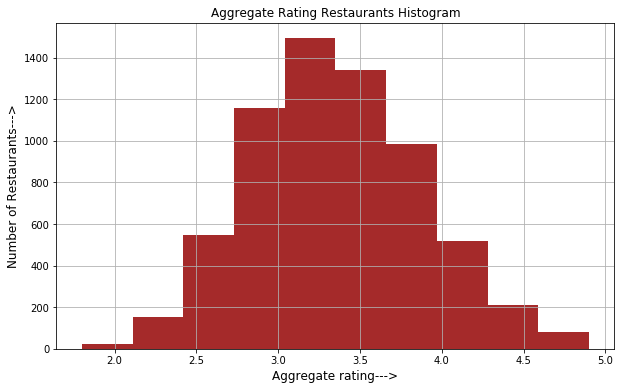

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# dropping unrated restaurants.
df.drop(df[df['Rating text'] == 'Not rated'].index , inplace = True)

# plotting histogram.
plt.figure(num=None, figsize=(10, 6),facecolor='w')
plt.hist(df['Aggregate rating'] , facecolor='brown', align='mid')
plt.grid()
plt.title('Aggregate Rating Restaurants Histogram', size = 12)
plt.xlabel('Aggregate rating--->', size=12)
plt.ylabel('Number of Restaurants--->', size=12)
plt.show()

# Ques 3.3:- Plot the bar graph top 10 restaurants in the data with the highest number of votes.

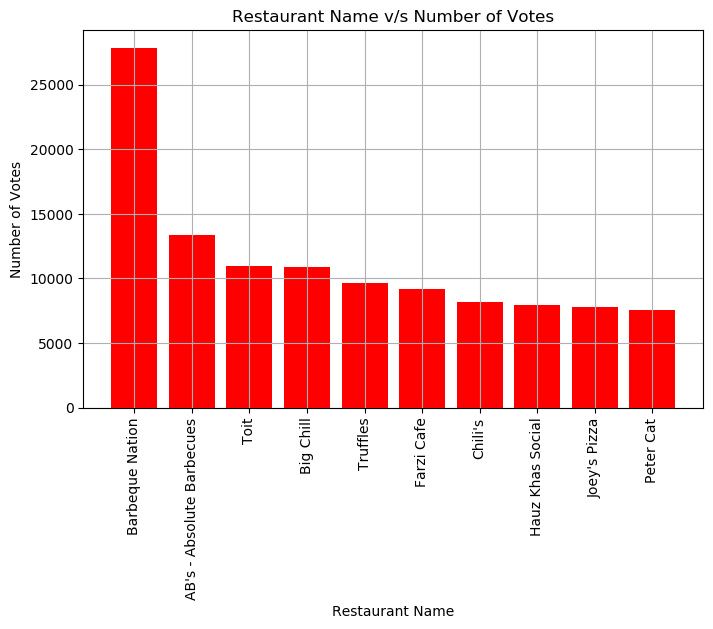

Restaurant Name
Barbeque Nation              27835
AB's - Absolute Barbecues    13400
Toit                         10934
Big Chill                    10853
Truffles                      9682
Farzi Cafe                    9189
Chili's                       8156
Hauz Khas Social              7931
Joey's Pizza                  7807
Peter Cat                     7574
Name: Votes, dtype: int64


In [53]:
import pandas as pd
import numpy as np

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

df.reset_index(drop = True, inplace = True)

# grouping data by restaurants and taking sum of votes of those same restaurants
# now sorting the restaurants according to the count of the votes and fetching top 10 of those.
votes = df.groupby("Restaurant Name")["Votes"].sum().sort_values(ascending=False)[0:10]

x = votes.index
y = votes.values

# plotting bar graph.
plt.figure(num=None, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='green')
plt.bar(x,y, color = 'red')
plt.grid()
plt.title('Restaurant Name v/s Number of Votes')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Votes')
plt.xticks(rotation = 90)
plt.show()

print(votes)


# Ques 3.4:- Plot the pie graph of top 10 cuisines present in restaurants in the USA.

Top 10 cuisines served by maximum number of restaurants in USA - 

American 112
Seafood 59
Burger 49
Sandwich 49
Pizza 49
Steak 42
Italian 38
Breakfast 37
Mexican 36
Sushi 34


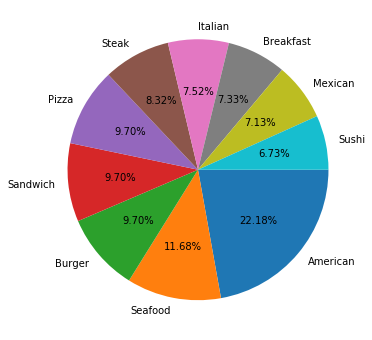

In [54]:
import pandas as pd
import numpy as np

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only UNITED STATES Restraunts - 
df = df[df['Country Code'] == 216]

# resetting index and then filling na value with Not Known.
df.reset_index(drop = True, inplace = True)
df['Cuisines'].fillna('Not known',inplace = True)
df['Cuisines'] = df['Cuisines'].str.split(', ')

# making dictionary for different cuisines in USA and their counts
usa_cuisines = {}
for i in df['Cuisines'] : 
    for j in i:
        usa_cuisines[j] = usa_cuisines.get(j, 0) + 1
    
# sorting dictionary by count and fetching top 10 cuisines.
top_cuisines = sorted(usa_cuisines.items(), key = lambda kv:kv[1], reverse = True)[:10]

x = []
label = []

print('Top 10 cuisines served by maximum number of restaurants in USA - ')
print()

# making list of cuisines names and their counts.
for i in top_cuisines:
    print(i[0],i[1])
    x.append(i[1])
    label.append(i[0])

# plotting pie chart.
plt.figure(num=None, figsize=(6, 6), facecolor='w', edgecolor='k')
plt.pie(x, labels = label, autopct='%.2f%%', counterclock=False)
plt.show()

# Ques 3.5:- Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

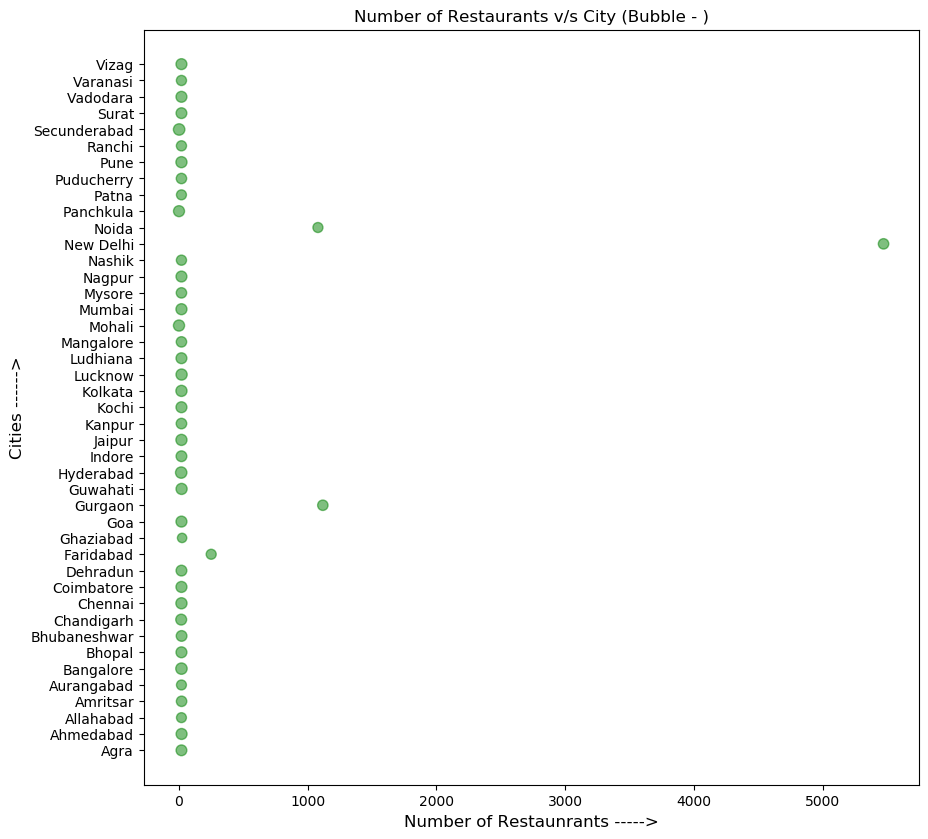

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('E:\zomato.csv', encoding = 'iso-8859-1')
df = file.copy()

# considering only INDIAN Restraunts - 
df = df[df['Country Code'] == 1]

# grouping dataframe by City and calculating Weighted rating.
x = df.groupby(by = 'City').apply(lambda x: ((x['Votes'] * x['Aggregate rating']).sum()))
y = df.groupby(by = 'City').apply(lambda x: (x['Votes'].sum()))
restaurant_count = df.groupby(by = 'City').count()['Restaurant Name']
weighted_rating = x/y

# plotting bubble graph and keeping weighted rating as size of the bubble.
plt.figure(num=None, figsize=(10, 10), dpi=100, facecolor='w', edgecolor='green')
plt.scatter(restaurant_count.values, restaurant_count.index,s = weighted_rating*15, alpha = 0.5, c = 'green')
plt.title('Number of Restaurants v/s City (Bubble - )')
plt.xlabel('Number of Restaunrants ----->', size = 12)
plt.ylabel('Cities ------>', size = 12)
plt.show()